In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Demographics and profiles at the Neighborhood Tabulation Area (NTA) level

Neighbhorhood tabulation areas (NTAs) are subdivisions of New York City used in census data. This dataset from the New York City government describes the demographics in each area.

Columns include: 
* Employment Status
* Occupation Industry
* Age 
* Gender
* If they have children
* Income
* Health Insurance Coverage

Full data can be downloaded as xls files from: https://data.cityofnewyork.us/City-Government/Demographics-and-profiles-at-the-Neighborhood-Tabu/hyuz-tij8


The features I focused on specifically are: 
* Percentage of civilian employed population 16 years and over in region in  management, business, science, and arts occupations. 
* Percentage of females 16 years and over in the labor force


In [6]:
my_df = pd.read_csv('nyc_demo_simplified.csv')
my_df.head()

,District,"Percentage of civilian employed population 16 years and over in management, business, science, and arts occupations",Percentage of females 16 years and over in labor force,"Household income less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999",...,"$15,000 to $24,999.1","$25,000 to $34,999.1","$35,000 to $49,999.1","$50,000 to $74,999.1","$75,000 to $99,999.1","$100,000 to $149,999.1","$150,000 to $199,999.1","$200,000 or more.1",Contains University,Contains tech companies
0,BK72 Williamsburg,33.6,34.9,20.8,18.8,17,12,12.5,8.1,4.7,...,18.5,13.8,13.2,9.3,4.6,4.4,1.2,1.4,NaN,NaN
1,BK73 North Side-South Side,52.4,67.6,11.5,7.3,10.5,8.9,10.7,15.7,10.1,...,15.8,11.5,13.7,12.2,7.5,9.9,4.6,6,NaN,NaN
2,BK76 Greenpoint,47.3,69,8.4,4.7,8.2,9.3,9.8,19,15.1,...,8,10.9,10.8,17.3,12.3,19.9,5.9,6.5,NaN,NaN
3,BK90 East Williamsburg,44.6,62.6,9.9,8.5,12.9,9.9,10.7,16.7,11.3,...,15.4,13.1,12.4,16.3,8.1,12.5,3.9,2.5,NaN,NaN
4,BK09 Brooklyn Heights-Cobble Hill,71.7,69.8,5.1,1.7,5.5,4.7,6.8,12.6,11,...,1.6,2.2,1.5,7.8,7.6,16.5,15.7,45.2,NaN,NaN


In [7]:
my_df.columns

Index(['District',
       '   Percentage of civilian employed population 16 years and over in management, business, science, and arts occupations',
       '   Percentage of females 16 years and over in labor force',
       '   Household income less than $10,000', '   $10,000 to $14,999',
       '   $15,000 to $24,999', '   $25,000 to $34,999',
       '   $35,000 to $49,999', '   $50,000 to $74,999',
       '   $75,000 to $99,999', '   $100,000 to $149,999',
       '   $150,000 to $199,999', '   $200,000 or more', '   With earnings',
       '   With Social Security', '   With retirement income',
       '   With Supplemental Security Income',
       '   With cash public assistance income',
       '   With Food Stamp/SNAP bnfts in the past 12 mo',
       '  Family Income less than $10,000', '   $10,000 to $14,999.1',
       '   $15,000 to $24,999.1', '   $25,000 to $34,999.1',
       '   $35,000 to $49,999.1', '   $50,000 to $74,999.1',
       '   $75,000 to $99,999.1', '   $100,000 to $1

### Rename cols, clean up outliers, change str to float 

In [8]:
old_cols = ['   Percentage of civilian employed population 16 years and over in management, business, science, and arts occupations','   Percentage of females 16 years and over in labor force']
new_cols = ['ppl in sci bus arts','working adult F']

my_df = my_df.rename(columns=dict(zip(old_cols,new_cols)))

# ppl in sci bus arts
my_df['ppl in sci bus arts'].replace('-', '0',inplace=True)
my_df['ppl in sci bus arts'].replace('514','51.4',inplace=True)
my_df['ppl in sci bus arts'].replace('1,990','0',inplace=True)
my_df['ppl in sci bus arts'] = my_df['ppl in sci bus arts'].astype(float)

# working adult F
my_df['working adult F'].replace('-', '0',inplace=True)
my_df['working adult F'].replace('4,795','47.95',inplace=True)
my_df['working adult F'].replace(472.0,'47.2',inplace=True)
my_df['working adult F'] = my_df['working adult F'].astype(float)

my_df.head()

,District,ppl in sci bus arts,working adult F,"Household income less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999",...,"$15,000 to $24,999.1","$25,000 to $34,999.1","$35,000 to $49,999.1","$50,000 to $74,999.1","$75,000 to $99,999.1","$100,000 to $149,999.1","$150,000 to $199,999.1","$200,000 or more.1",Contains University,Contains tech companies
0,BK72 Williamsburg,33.6,34.9,20.8,18.8,17,12,12.5,8.1,4.7,...,18.5,13.8,13.2,9.3,4.6,4.4,1.2,1.4,NaN,NaN
1,BK73 North Side-South Side,52.4,67.6,11.5,7.3,10.5,8.9,10.7,15.7,10.1,...,15.8,11.5,13.7,12.2,7.5,9.9,4.6,6,NaN,NaN
2,BK76 Greenpoint,47.3,69.0,8.4,4.7,8.2,9.3,9.8,19,15.1,...,8,10.9,10.8,17.3,12.3,19.9,5.9,6.5,NaN,NaN
3,BK90 East Williamsburg,44.6,62.6,9.9,8.5,12.9,9.9,10.7,16.7,11.3,...,15.4,13.1,12.4,16.3,8.1,12.5,3.9,2.5,NaN,NaN
4,BK09 Brooklyn Heights-Cobble Hill,71.7,69.8,5.1,1.7,5.5,4.7,6.8,12.6,11,...,1.6,2.2,1.5,7.8,7.6,16.5,15.7,45.2,NaN,NaN


In [10]:
my_df[my_df['ppl in sci bus arts'] > 70]

,District,ppl in sci bus arts,working adult F,"Household income less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999",...,"$15,000 to $24,999.1","$25,000 to $34,999.1","$35,000 to $49,999.1","$50,000 to $74,999.1","$75,000 to $99,999.1","$100,000 to $149,999.1","$150,000 to $199,999.1","$200,000 or more.1",Contains University,Contains tech companies
4,BK09 Brooklyn Heights-Cobble Hill,71.7,69.8,5.1,1.7,5.5,4.7,6.8,12.6,11,...,1.6,2.2,1.5,7.8,7.6,16.5,15.7,45.2,NaN,NaN
89,MN23 West Village,71.4,70.4,5.1,2.7,5.4,4.6,6.9,13.4,10,...,2.3,1.7,2.7,10.7,6.1,13.8,13.9,46.3,NaN,NaN
91,MN25 Battery Park City-Lower Manhattan,70.1,73.5,5.1,2.1,3.5,3.8,4.9,11.2,9.9,...,2.6,1.8,3.3,7.2,5.9,15.4,12.9,48.5,NaN,NaN
97,MN17 Midtown-Midtown South,70.1,63.8,8.8,4.8,5.4,5.2,8.4,6.8,5.4,...,4,3.5,8.1,3.1,5.2,14.8,10,45,NaN,NaN
102,MN12 Upper West Side,72.3,65.4,8.2,4.1,5.9,5.6,7.8,11.9,9.2,...,4.2,4.6,5.1,7.7,7.3,15.9,12,37.6,NaN,NaN
103,MN14 Lincoln Square,74.6,63.5,6.1,3.9,6,4.4,5.7,10.9,9.4,...,3.8,3,2.1,8.3,6,14,11.3,46.9,NaN,NaN
106,MN40 Upper East Side-Carnegie Hill,73.1,54.0,3.7,1.7,3.6,3.5,4.6,9.8,8.8,...,1.8,1.1,2.4,5.2,5.7,12.2,10.3,59.1,NaN,NaN


In [11]:
plot_industry = my_df[['District','ppl in sci bus arts']]
plot_industry.sort_values(by = 'ppl in sci bus arts',ascending = False, inplace= True)
#print(plot_industry.head())

plot_f = my_df[['District','working adult F']]
plot_f.sort_values(by = 'working adult F',ascending = False, inplace= True)
#print(plot_f.head())

/home/kmussar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/kmussar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


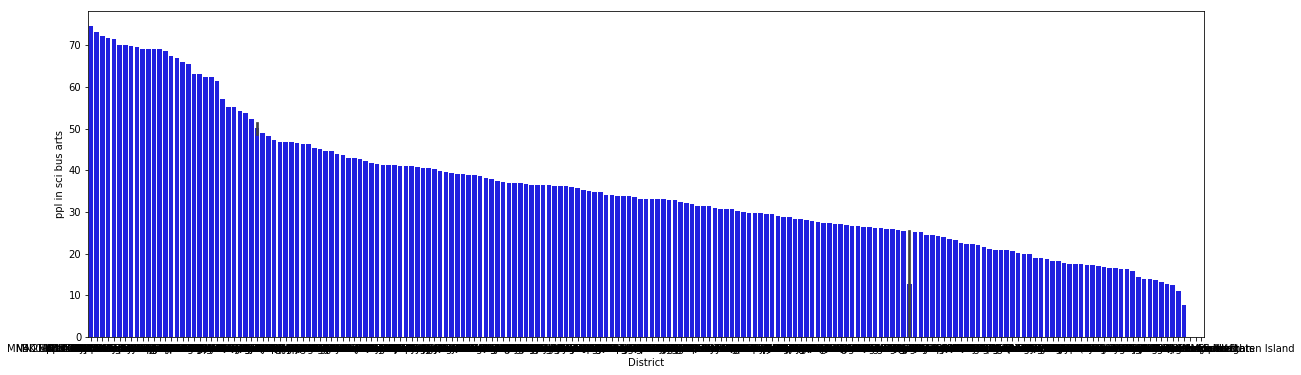

In [142]:
plt.figure(figsize=(20,6))
sns.barplot(x ='District',y ='ppl in sci bus arts',data=plot_industry,color='Blue')

/home/kmussar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


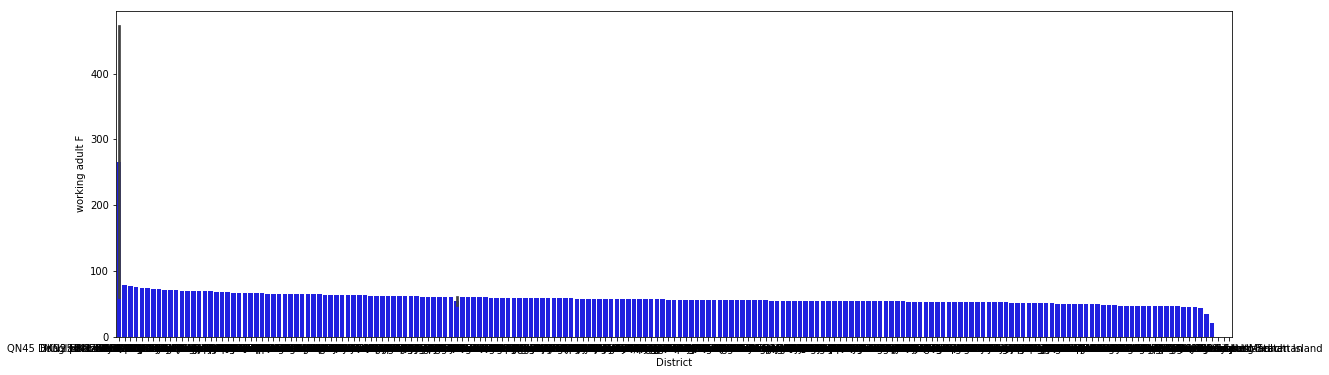

In [12]:
plt.figure(figsize=(20,6))
sns.barplot(x ='District',y ='working adult F',data=plot_f,color='Blue')

In [13]:
my_df[my_df['working adult F'] > 70]

,District,ppl in sci bus arts,working adult F,"Household income less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999",...,"$15,000 to $24,999.1","$25,000 to $34,999.1","$35,000 to $49,999.1","$50,000 to $74,999.1","$75,000 to $99,999.1","$100,000 to $149,999.1","$150,000 to $199,999.1","$200,000 or more.1",Contains University,Contains tech companies
12,BK99 park-cemetery-etc-Brooklyn,43.6,78.3,0,0,0,21.2,27.1,32.9,0,...,0,26.4,0,9.7,0,0,0,0,NaN,NaN
17,BK37 Park Slope-Gowanus,69.2,75.3,4,2.6,4.5,4.1,8.4,15.5,12.6,...,3.1,3.3,7,12.1,10.4,21.1,14.9,24.9,NaN,NaN
22,BK64 Prospect Heights,67.5,77.9,5.8,2.7,7.7,6.1,8.2,17.3,11.5,...,8.6,5.1,6.7,13.1,8.4,21.8,11.8,17.7,NaN,NaN
89,MN23 West Village,71.4,70.4,5.1,2.7,5.4,4.6,6.9,13.4,10,...,2.3,1.7,2.7,10.7,6.1,13.8,13.9,46.3,NaN,NaN
91,MN25 Battery Park City-Lower Manhattan,70.1,73.5,5.1,2.1,3.5,3.8,4.9,11.2,9.9,...,2.6,1.8,3.3,7.2,5.9,15.4,12.9,48.5,NaN,NaN
96,MN15 Clinton,63.0,72.7,8.2,5.7,8.4,9.2,8.9,14.9,10.7,...,7.1,9.5,11.5,11.1,11.8,13.4,9.3,20.5,NaN,NaN
99,MN20 Murray Hill-Kips Bay,69.7,70.9,6.5,4,5.3,4.1,8,13.9,11,...,3.7,3.8,5.5,5.8,6.6,18.3,11.7,37.7,NaN,NaN
100,MN21 Gramercy,69.9,73.9,6.8,2.4,4.8,4.2,7.3,13.7,11.7,...,3.5,2.5,4.4,7.6,11.1,20.1,14.5,32.1,NaN,NaN
105,MN32 Yorkville,68.7,71.6,4.9,2.7,7,4.5,7.1,15.5,12.1,...,4,2,4.1,9.5,9.1,15.4,12.6,39.3,NaN,NaN
158,QN45 Douglas Manor-Douglaston-Little Neck,51.4,472.0,132,85,176,182,188,240,238,...,109,160,152,218,203,267,156,192,NaN,NaN


In [14]:
industry_dists = my_df[my_df['ppl in sci bus arts'] > 70]['District']
industry_dists

4           BK09 Brooklyn Heights-Cobble Hill
89                          MN23 West Village
91     MN25 Battery Park City-Lower Manhattan
97                 MN17 Midtown-Midtown South
102                      MN12 Upper West Side
103                       MN14 Lincoln Square
106        MN40 Upper East Side-Carnegie Hill
Name: District, dtype: object

In [15]:
female_dists = my_df[my_df['working adult F'] > 70]['District']
female_dists

12               BK99 park-cemetery-etc-Brooklyn
17                       BK37 Park Slope-Gowanus
22                         BK64 Prospect Heights
89                             MN23 West Village
91        MN25 Battery Park City-Lower Manhattan
96                                  MN15 Clinton
99                     MN20 Murray Hill-Kips Bay
100                                MN21 Gramercy
105                               MN32 Yorkville
158    QN45 Douglas Manor-Douglaston-Little Neck
169                                QN05 Rosedale
Name: District, dtype: object

In [16]:
dists_of_interest = []
for i in industry_dists: 
    dists_of_interest.append(i)
for i in female_dists:
    dists_of_interest.append(i)
dists_of_interest

['BK09 Brooklyn Heights-Cobble Hill',
 'MN23 West Village',
 'MN25 Battery Park City-Lower Manhattan',
 'MN17 Midtown-Midtown South',
 'MN12 Upper West Side',
 'MN14 Lincoln Square',
 'MN40 Upper East Side-Carnegie Hill',
 'BK99 park-cemetery-etc-Brooklyn',
 'BK37 Park Slope-Gowanus',
 'BK64 Prospect Heights',
 'MN23 West Village',
 'MN25 Battery Park City-Lower Manhattan',
 'MN15 Clinton',
 'MN20 Murray Hill-Kips Bay',
 'MN21 Gramercy',
 'MN32 Yorkville',
 'QN45 Douglas Manor-Douglaston-Little Neck',
 'QN05 Rosedale']

In [17]:
print(len(dists_of_interest))
print(len(set(dists_of_interest)))

18
16


## Create new dataframe with station-linenames to use as unique ids

In [3]:
names = pd.read_csv('Unique_SubwayNames.csv')
names.head()

,STATION,LINENAME
0,1 AV,L
1,103 ST,1
2,103 ST,6
3,103 ST,BC
4,103 ST-CORONA,7


In [6]:
names['unique_name'] = names['STATION'] + " - " + names['LINENAME']
names.head()

,STATION,LINENAME,unique_name
0,1 AV,L,1 AV - L
1,103 ST,1,103 ST - 1
2,103 ST,6,103 ST - 6
3,103 ST,BC,103 ST - BC
4,103 ST-CORONA,7,103 ST-CORONA - 7


In [8]:
names.to_csv('connect_stations_NTA.csv')

In [9]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 3 columns):
STATION        447 non-null object
LINENAME       446 non-null object
unique_name    446 non-null object
dtypes: object(3)
memory usage: 10.6+ KB


# Load dataframe with NTA areas, station names, univ presence

In [10]:
connected_stations = pd.read_csv('connected_stations_NTA.csv')
connected_stations.head()

,Index,STATION,LINENAME,unique_name,NTA dist ID,NTA dist name,Univ_near,University Name,Flatiron district,Dumbo
0,0,1 AV,L,1 AV - L,NaN,NaN,N,NaN,N,N
1,1,103 ST,1,103 ST - 1,MN12,Upper West Side,N,NaN,N,N
2,2,103 ST,6,103 ST - 6,NaN,NaN,N,NaN,N,N
3,3,103 ST,BC,103 ST - BC,NaN,NaN,N,NaN,N,N
4,4,103 ST-CORONA,7,103 ST-CORONA - 7,NaN,NaN,N,NaN,N,N


In [11]:
connected_stations['unique_name'] = connected_stations['STATION'] + ' - ' + connected_stations['LINENAME']
connected_stations.tail()

,Index,STATION,LINENAME,unique_name,NTA dist ID,NTA dist name,Univ_near,University Name,Flatiron district,Dumbo
470,468,WOODHAVEN BLVD,JZ,WOODHAVEN BLVD - JZ,NaN,NaN,N,NaN,N,N
471,469,WOODHAVEN BLVD,MR,WOODHAVEN BLVD - MR,NaN,NaN,N,NaN,N,N
472,470,WOODLAWN,4,WOODLAWN - 4,NaN,NaN,N,NaN,N,N
473,471,WORLD TRADE CTR,ACE23,WORLD TRADE CTR - ACE23,NaN,NaN,N,NaN,N,N
474,473,ZEREGA AV,6,ZEREGA AV - 6,NaN,NaN,N,NaN,N,N


# Ready to add turnstile data to this df! (Or to add this to turnstile) 